In [123]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [124]:
def pre_processing(path_df: str) -> pd.DataFrame:
    # Load DataFrame
    df = pd.read_parquet(path=path_df)
    
    if 'lpep_pickup_datetime' in df.columns and 'lpep_dropoff_datetime' in df.columns:
        pickup_col, dropoff_col = 'lpep_pickup_datetime', 'lpep_dropoff_datetime'
    elif 'tpep_pickup_datetime' in df.columns and 'tpep_dropoff_datetime' in df.columns:
        pickup_col, dropoff_col = 'tpep_pickup_datetime', 'tpep_dropoff_datetime'
    
    # Transformando valores em datetime e criando a coluna duração
    df[pickup_col] = pd.to_datetime(df[pickup_col])
    df[dropoff_col] = pd.to_datetime(df[dropoff_col])
    df['duration'] = df[dropoff_col] - df[pickup_col]
    df['duration'] = df['duration'].apply(lambda time: time.total_seconds() / 60)
    
    # Filtrando Duração da Viagem
    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
    
    return df

In [125]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

def transform_variables(
    df: pd.DataFrame,
    dict_vectorizer: DictVectorizer,
):
    # Transformar variáveis categóricas
    df[categorical] = df[categorical].astype(str)

    data_dicts = df[categorical + numerical].to_dict(orient="records")
    X = dict_vectorizer.transform(data_dicts)
    y = df["duration"].values

    return X, y

In [126]:
df_train = pre_processing(
    path_df="https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
)  # janeiro
df_test = pre_processing(
    path_df="https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"
)  # fevereiro

In [127]:
dict_vectorizer = DictVectorizer()

# Transformação do conjunto de treinamento
df_train[categorical] = df_train[categorical].astype(str)
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dict_vectorizer.fit_transform(train_dicts)
y_train = df_train['duration'].values

# Transformação do conjunto de teste usando o mesmo DictVectorizer
X_test, y_test = transform_variables(df_test, dict_vectorizer)


In [128]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [129]:
y_pred = lr.predict(X_test)

<Axes: ylabel='Count'>

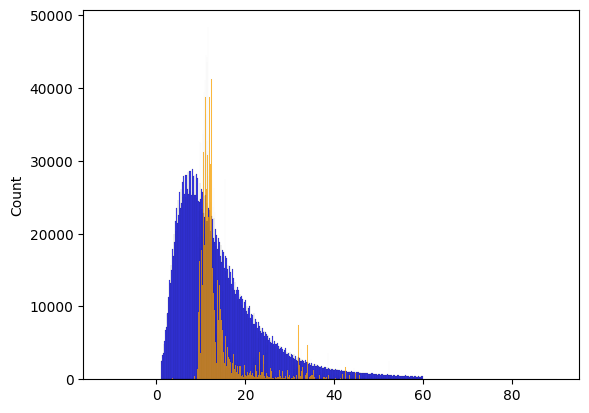

In [130]:
sns.histplot(y_test, legend="actual", color="blue", edgecolor="black")
sns.histplot(y_pred, legend="predict", color="orange", edgecolor="black")

In [131]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(7.820197545075633)